[Tune Your Scikit-learn Model Using Evolutionary Algorithms](https://towardsdatascience.com/tune-your-scikit-learn-model-using-evolutionary-algorithms-30538248ac16)

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = load_digits()
n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data.target
X.shape, y.shape

((1797, 64), (1797,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
clf = RandomForestClassifier()

In [6]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn_genetic.space import Integer, Categorical, Continuous
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space

In [8]:
param_grid = {
    'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
    'bootstrap': Categorical([True, False]),
    'max_leaf_nodes': Integer(2, 35),
    'n_estimators': Integer(10, 300),
}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
evolved_estimator = GASearchCV(
    estimator=clf,
    n_jobs=-1,
    cv=cv,
    elitism=True,
    criteria='max',
    verbose=True,
    keep_top_k=4,
    generations=35,
    tournament_size=3,
    scoring='accuracy',
    population_size=10,
    param_grid=param_grid,
    mutation_probability=0.1,
    crossover_probability=0.8,
    algorithm='eaMuPlusLambda'
    )

In [9]:
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.762328	0.11372    	0.907211   	0.58443    
1  	17    	0.875648	0.0479928  	0.912756   	0.784751   
2  	18    	0.910731	0.00600876 	0.918343   	0.901635   
3  	17    	0.920367	0.0068603  	0.929464   	0.907211   
4  	18    	0.922778	0.00440819 	0.929464   	0.91646    
5  	18    	0.925381	0.00329787 	0.929464   	0.920194   
6  	18    	0.927045	0.00524977 	0.935009   	0.91646    
7  	18    	0.930013	0.00389569 	0.93502    	0.922036   
8  	18    	0.930199	0.00471024 	0.93502    	0.920163   
9  	16    	0.932794	0.00284918 	0.93502    	0.927602   
10 	15    	0.934091	0.00124612 	0.93502    	0.931306   
11 	20    	0.934653	0.00350931 	0.940606   	0.929454   
12 	17    	0.934654	0.00330416 	0.940606   	0.931306   
13 	19    	0.937631	0.00324234 	0.940606   	0.931306   
14 	19    	0.933724	0.00531758 	0.940606   	0.920184   
15 	18    	0.935021	0.00248916 	0.936882   	0.929464   
16 	20    	0.934461	0.0031062  	0.936882   	0.92

0.9356120826709062

In [10]:
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test, y_predicy_ga)

0.9356120826709062

In [11]:
evolved_estimator.best_params_

{'min_weight_fraction_leaf': 0.010271583894761528,
 'bootstrap': True,
 'max_leaf_nodes': 30,
 'n_estimators': 183}

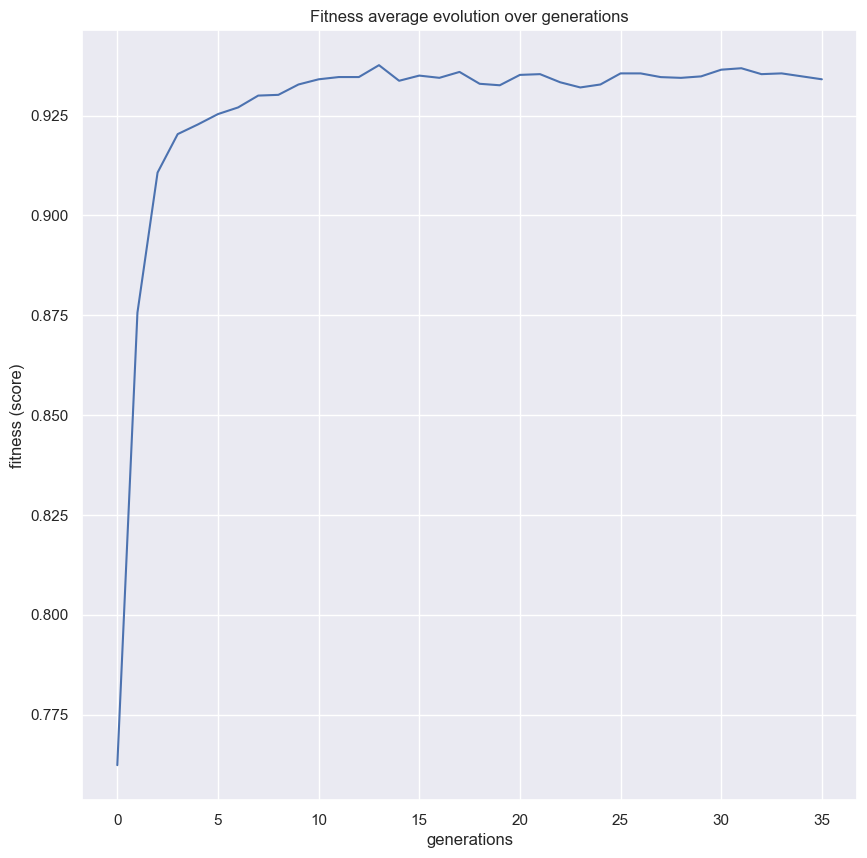

In [13]:
plot_fitness_evolution(evolved_estimator);

In [14]:
print("Parameters and cv score in each iteration:")
print(evolved_estimator.logbook)

Parameters and cv score in each iteration:
                                                                                                                                                parameters                                                                                                                                                
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
bootstrap	cv_scores                         	fit_time                          	index	max_leaf_nodes	min_weight_fraction_leaf	n_estimators	score   	score_time                        	test_score                        	train_score                       
True     	[0.91111111 0.88333333 0.8603352 ]	[0.20448709 0.20741582 0.20812535]	0    	11            	0.053

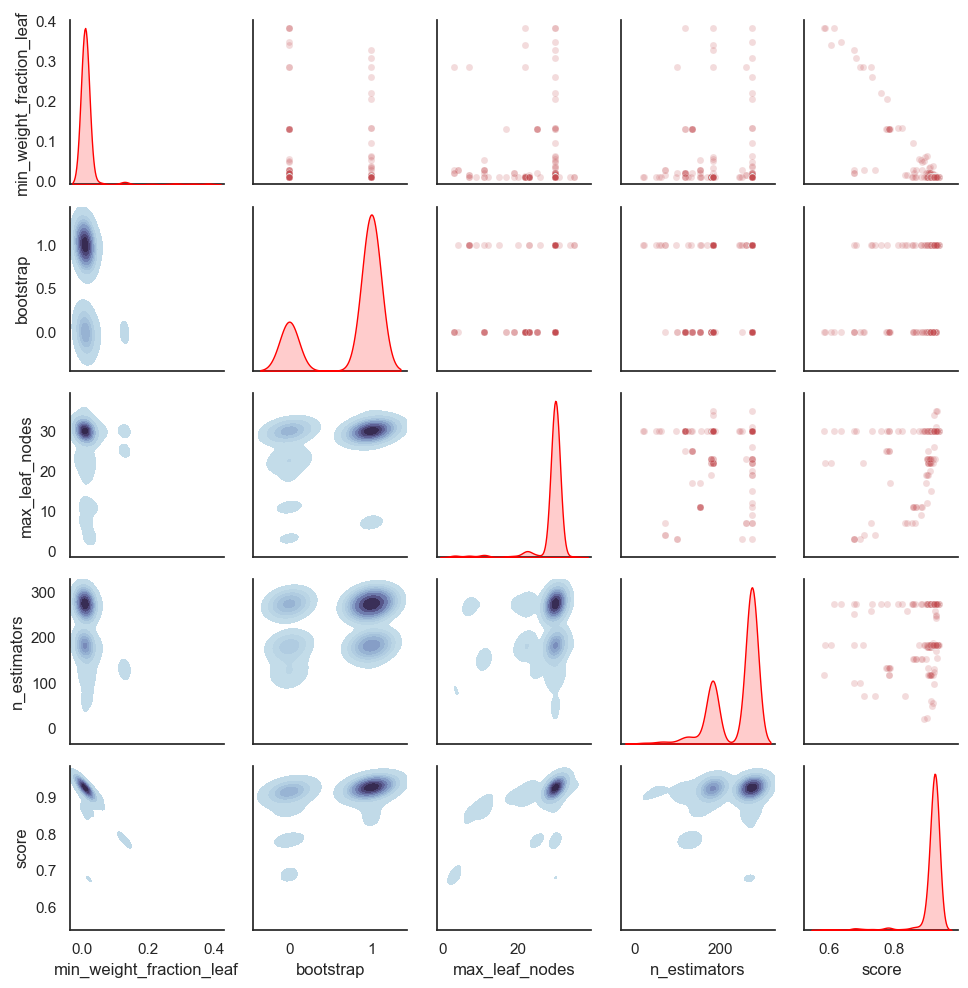

In [18]:
plot_search_space(evolved_estimator);

In [19]:
print("Best k solutions:")
evolved_estimator.hof

Best k solutions:


{0: {'min_weight_fraction_leaf': 0.010271583894761528,
  'bootstrap': True,
  'max_leaf_nodes': 30,
  'n_estimators': 183},
 1: {'min_weight_fraction_leaf': 0.010271583894761528,
  'bootstrap': True,
  'max_leaf_nodes': 35,
  'n_estimators': 275},
 2: {'min_weight_fraction_leaf': 0.010271583894761528,
  'bootstrap': True,
  'max_leaf_nodes': 30,
  'n_estimators': 275},
 3: {'min_weight_fraction_leaf': 0.010271583894761528,
  'bootstrap': True,
  'max_leaf_nodes': 30,
  'n_estimators': 183}}